In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
import pandas as pd

In [3]:
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv', nrows=1000000)

In [4]:
bikes['start'] = pd.to_datetime(bikes['Start date'],infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

In [5]:
x = hours.hour
y = hours.start

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [7]:
model = LinearRegression().fit(x_train, y_train)

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model.predict(x_train))

80548.474870891514

In [9]:
mean_squared_error(y_test, model.predict(x_test))

71574.380581614329

## 2.  Repeat #1 for a Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
model = Ridge().fit(x_train, y_train)

In [12]:
mean_squared_error(y_train, model.predict(x_train))

80548.474884956726

In [13]:
mean_squared_error(y_test, model.predict(x_test))

71574.332895785439

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge. Train_size = (.001, .01, .1, .2, .4, .6, .8, .9)

In [14]:
train_size = [.001,.01,.1,.2,.4,.6,.8,.9]
error_list=[]

for size in train_size:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = LinearRegression().fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((size, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequen

In [15]:
error_list

[(0.001, 0.0, 92601.191799861015),
 (0.01, 48386.269683481893, 91772.152826249061),
 (0.1, 62956.7717478181, 77931.665167610408),
 (0.2, 72692.426402383411, 77040.16963544488),
 (0.4, 78069.790862030059, 75001.481974667971),
 (0.6, 78069.158570265296, 73193.466169645806),
 (0.8, 73971.074871420482, 84418.186588013486),
 (0.9, 75014.492034312294, 85485.767889545896)]

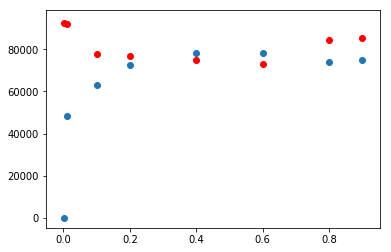

In [16]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

In [17]:
error_list=[]
for size in train_size:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = Ridge().fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((size, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .v

In [18]:
error_list

[(0.001, 0.0, 93959.289089645594),
 (0.01, 60583.157567844908, 85111.74043473645),
 (0.1, 77572.772041671837, 76102.873714701142),
 (0.2, 83470.127649307891, 74802.21697573486),
 (0.4, 76911.176891734402, 75511.897292080597),
 (0.6, 76864.437612023437, 74826.251386574862),
 (0.8, 76762.247612703693, 73252.002244895441),
 (0.9, 76148.533095096544, 75267.991076599224)]

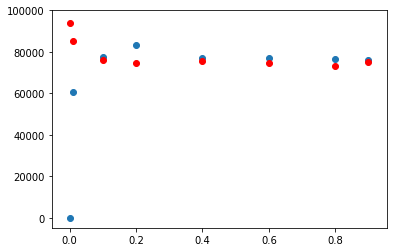

In [19]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

In [20]:
alpha_values = [1, 10, 25, 50, 100, 200, 500, 1000, 2000, 5000, 6000, 7000, 8000, 9000, 10000]
error_list=[]

for av in alpha_values:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = Ridge(alpha=av).fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((av, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequen

In [21]:
error_list

[(1, 74822.194498708603, 81241.580216866379),
 (10, 74272.450125034433, 83716.03354905959),
 (25, 74698.599992547752, 81447.248082686521),
 (50, 76750.001662193754, 73349.844027316038),
 (100, 76911.607481911764, 72774.139143410139),
 (200, 75652.40696255659, 77787.34157207745),
 (500, 77551.031210836212, 70125.526332308713),
 (1000, 76320.652048358417, 75367.243416587255),
 (2000, 74713.078050852957, 82101.963013693705),
 (5000, 78030.803612450807, 68811.662915262277),
 (6000, 78485.427641723159, 66955.811980405226),
 (7000, 76613.864043830981, 75551.947024098728),
 (8000, 74298.895719074673, 83990.482905687328),
 (9000, 75485.199940081584, 80093.554541372723),
 (10000, 76333.808728228018, 77691.717210382558)]

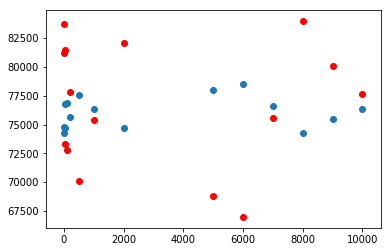

In [22]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

Initially, the testing error is much higher than the training error. Eventually, as the alpha parameter continues to increase (becomes more stiff), both training error and testing error become closer together.

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)

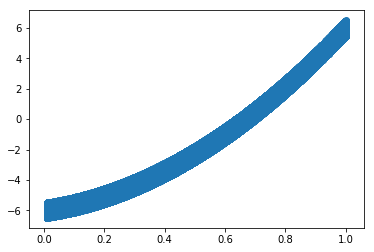

In [23]:
from sklearn.preprocessing import PolynomialFeatures

n1 = 500000
x1 = np.linspace(0.01, 1, n1).reshape(-1, 1)
y1 = (np.linspace(0.01, 3, n1) - 2) * (np.linspace(0.01, 3, n1) + 3) + np.random.rand(n1) - .5

plt.scatter(x1,y1)

In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split (x1, y1, train_size=.8)

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
poly_list = [1, 2, 4, 7, 20, 50]
error_list = []
def transform(x):
    return poly.transform(x.reshape(-1, 1))

In [34]:
for p in poly_list:
    poly = PolynomialFeatures(degree=p)
    poly.fit(x1_train.reshape(-1,1))
    
    lin1 = LinearRegression().fit(transform(x1_train), y1_train.flatten())

    train_error = mean_squared_error(y1_train, lin1.predict((transform(x1_train))))
    test_error = mean_squared_error(y1_test, lin1.predict(transform(x1_test)))
    error_list.append((p, train_error, test_error))

In [35]:
error_list

[(1, 0.52587822368503379, 0.52391152089521931),
 (2, 0.083205666032761541, 0.082745198946045678),
 (4, 0.083205315934297031, 0.082745835214043745),
 (7, 0.083204195802383807, 0.082750911563691534),
 (20, 0.083201990242226673, 0.082751780480256262),
 (50, 0.083200354806200916, 0.082752483153327519)]

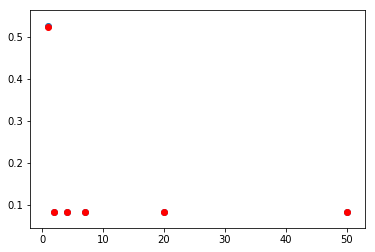

In [36]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')